In [1]:
import os
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

import ray
from ray.tune import ExperimentAnalysis
from src.evaluation.util import backtest_expt, get_expt_results_cv, get_best_expt, expt_all_progress_cv, get_best_trials
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Loading BokehJS ...

In [2]:
local_dir = "./experiments/expt_algo"
expt_name = "A2C__2022-01-08_05-34"
expt = os.path.join(local_dir, expt_name)
expt

'./experiments/expt_algo/A2C__2022-01-08_05-34'

In [3]:
ray.init(num_gpus=0, ignore_reinit_error=True)

with open(os.path.join(expt, "analysis.pkl"), "rb") as f:
    analysis: ExperimentAnalysis = pickle.load(f)

In [4]:
all_results_cv = get_expt_results_cv(analysis)
best_progress, best_config = get_best_expt(analysis)
print(best_config)
best_progress

{'lr': 0.00422490598182387, 'gamma': 0.9246302146977416, 'lambda': 0.6490742829313104}
                 episode_reward_mean  evaluation/episode_reward_mean
timesteps_total                                                     
5000                       -0.239659                       -0.010149
10000                      -0.223836                       -0.032085
15000                      -0.217080                        0.037069
20000                      -0.214450                       -0.027465
25000                      -0.213939                        0.033837
30000                      -0.212172                        0.106538
35000                      -0.207641                       -0.025292
40000                      -0.207556                       -0.049754
45000                      -0.207781                        0.056557
50000                      -0.210094                        0.119263
55000                      -0.212533                       -0.021340
60000           

,episode_reward_mean,evaluation/episode_reward_mean
timesteps_total,,
5000,-0.239659,-0.010149
10000,-0.223836,-0.032085
15000,-0.217080,0.037069
20000,-0.214450,-0.027465
25000,-0.213939,0.033837
30000,-0.212172,0.106538
35000,-0.207641,-0.025292
40000,-0.207556,-0.049754
45000,-0.207781,0.056557


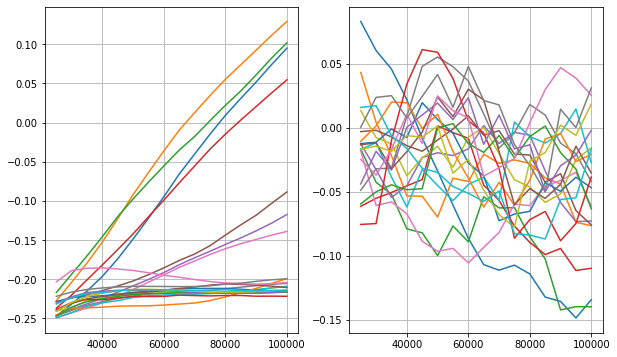

In [5]:
expt_all_progress_cv(analysis)

In [6]:
backtest_expt(analysis, debug=False)

2022-01-09 11:33:27,182	INFO trainer.py:743 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


{'lr': 0.00422490598182387, 'gamma': 0.9246302146977416, 'lambda': 0.6490742829313104}
                 episode_reward_mean  evaluation/episode_reward_mean
timesteps_total                                                     
5000                       -0.239659                       -0.010149
10000                      -0.223836                       -0.032085
15000                      -0.217080                        0.037069
20000                      -0.214450                       -0.027465
25000                      -0.213939                        0.033837
30000                      -0.212172                        0.106538
35000                      -0.207641                       -0.025292
40000                      -0.207556                       -0.049754
45000                      -0.207781                        0.056557
50000                      -0.210094                        0.119263
55000                      -0.212533                       -0.021340
60000           

(RolloutWorker pid=28278) 2022-01-09 11:33:29,879	WARNING deprecation.py:45 -- DeprecationWarning: `convert_to_non_torch_type` has been deprecated. Use `ray/rllib/utils/numpy.py::convert_to_numpy` instead. This will raise an error in the future!
2022-01-09 11:33:29,964	WARNING deprecation.py:45 -- DeprecationWarning: `convert_to_non_torch_type` has been deprecated. Use `ray/rllib/utils/numpy.py::convert_to_numpy` instead. This will raise an error in the future!
2022-01-09 11:33:29,971	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-01-09 11:33:30,131	INFO trainable.py:467 -- Restored on 192.168.88.240 from checkpoint: /home/yoshiakira/DRL-Trading/experiments/expt_algo/A2C__2022-01-08_05-34/ExperimentCV-0_c54cd6a2/checkpoint_000020/checkpoint-20
2022-01-09 11:33:30,133	INFO trainable.py:475 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': 0, '_time_total': 182.10046577453613, '_

============================== Training ==============================
Return [%]               26.759415
Buy & Hold Return [%]    81.838317
Return (Ann.) [%]         4.864572
Volatility (Ann.) [%]     7.522374
dtype: object
============================== Validation ==============================
Return [%]               32.744113
Buy & Hold Return [%]     9.285278
Return (Ann.) [%]         15.27966
Volatility (Ann.) [%]     9.256554
dtype: object
============================== Testing ==============================
Return [%]               -1.560928
Buy & Hold Return [%]    18.801332
Return (Ann.) [%]        -1.567098
Volatility (Ann.) [%]     1.642762
dtype: object


2022-01-09 11:33:38,075	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
(RolloutWorker pid=28280) 2022-01-09 11:33:38,011	WARNING deprecation.py:45 -- DeprecationWarning: `convert_to_non_torch_type` has been deprecated. Use `ray/rllib/utils/numpy.py::convert_to_numpy` instead. This will raise an error in the future!
2022-01-09 11:33:38,228	INFO trainable.py:467 -- Restored on 192.168.88.240 from checkpoint: /home/yoshiakira/DRL-Trading/experiments/expt_algo/A2C__2022-01-08_05-34/ExperimentCV-1_c62ca052/checkpoint_000020/checkpoint-20
2022-01-09 11:33:38,228	INFO trainable.py:475 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': 0, '_time_total': 181.1602442264557, '_episodes_total': 80}


============================== Training ==============================
Return [%]               72.049398
Buy & Hold Return [%]    60.877297
Return (Ann.) [%]        11.482208
Volatility (Ann.) [%]      7.17946
dtype: object
============================== Validation ==============================
Return [%]               18.481065
Buy & Hold Return [%]    33.200597
Return (Ann.) [%]         8.904288
Volatility (Ann.) [%]     5.021045
dtype: object
============================== Testing ==============================
Return [%]               -9.525978
Buy & Hold Return [%]    -6.971779
Return (Ann.) [%]        -9.562055
Volatility (Ann.) [%]    10.391494
dtype: object


(RolloutWorker pid=28282) 2022-01-09 11:33:45,726	WARNING deprecation.py:45 -- DeprecationWarning: `convert_to_non_torch_type` has been deprecated. Use `ray/rllib/utils/numpy.py::convert_to_numpy` instead. This will raise an error in the future!
2022-01-09 11:33:45,787	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-01-09 11:33:45,944	INFO trainable.py:467 -- Restored on 192.168.88.240 from checkpoint: /home/yoshiakira/DRL-Trading/experiments/expt_algo/A2C__2022-01-08_05-34/ExperimentCV-2_394ba48e/checkpoint_000020/checkpoint-20
2022-01-09 11:33:45,945	INFO trainable.py:475 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': 0, '_time_total': 181.33887600898743, '_episodes_total': 80}


============================== Training ==============================
Return [%]                4.105694
Buy & Hold Return [%]    75.805818
Return (Ann.) [%]          0.81056
Volatility (Ann.) [%]     7.503429
dtype: object
============================== Validation ==============================
Return [%]              -11.310824
Buy & Hold Return [%]    11.220866
Return (Ann.) [%]        -5.847585
Volatility (Ann.) [%]     8.385697
dtype: object
============================== Testing ==============================
Return [%]                 5.90859
Buy & Hold Return [%]    28.673835
Return (Ann.) [%]          5.90859
Volatility (Ann.) [%]      8.35072
dtype: object


(RolloutWorker pid=28279) 2022-01-09 11:33:53,330	WARNING deprecation.py:45 -- DeprecationWarning: `convert_to_non_torch_type` has been deprecated. Use `ray/rllib/utils/numpy.py::convert_to_numpy` instead. This will raise an error in the future!
2022-01-09 11:33:53,402	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-01-09 11:33:53,543	INFO trainable.py:467 -- Restored on 192.168.88.240 from checkpoint: /home/yoshiakira/DRL-Trading/experiments/expt_algo/A2C__2022-01-08_05-34/ExperimentCV-3_39a95476/checkpoint_000020/checkpoint-20
2022-01-09 11:33:53,544	INFO trainable.py:475 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': 0, '_time_total': 181.14894461631775, '_episodes_total': 80}


============================== Training ==============================
Return [%]                24.32281
Buy & Hold Return [%]    83.665065
Return (Ann.) [%]         4.461269
Volatility (Ann.) [%]     5.391326
dtype: object
============================== Validation ==============================
Return [%]                3.11181
Buy & Hold Return [%]    19.97772
Return (Ann.) [%]        1.547079
Volatility (Ann.) [%]    8.169426
dtype: object
============================== Testing ==============================
Return [%]              -22.231709
Buy & Hold Return [%]    15.027616
Return (Ann.) [%]       -22.154383
Volatility (Ann.) [%]    10.430728
dtype: object


2022-01-09 11:34:01,022	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
(RolloutWorker pid=28276) 2022-01-09 11:34:00,961	WARNING deprecation.py:45 -- DeprecationWarning: `convert_to_non_torch_type` has been deprecated. Use `ray/rllib/utils/numpy.py::convert_to_numpy` instead. This will raise an error in the future!
2022-01-09 11:34:01,159	INFO trainable.py:467 -- Restored on 192.168.88.240 from checkpoint: /home/yoshiakira/DRL-Trading/experiments/expt_algo/A2C__2022-01-08_05-34/ExperimentCV-4_39fc0ebe/checkpoint_000020/checkpoint-20
2022-01-09 11:34:01,160	INFO trainable.py:475 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': 0, '_time_total': 180.6572766304016, '_episodes_total': 80}


============================== Training ==============================
Return [%]               16.726273
Buy & Hold Return [%]    37.161237
Return (Ann.) [%]         3.151728
Volatility (Ann.) [%]     6.769496
dtype: object
============================== Validation ==============================
Return [%]               25.611437
Buy & Hold Return [%]     49.29311
Return (Ann.) [%]        12.051208
Volatility (Ann.) [%]    17.841042
dtype: object
============================== Testing ==============================
Return [%]                 0.25478
Buy & Hold Return [%]    28.878055
Return (Ann.) [%]         0.253772
Volatility (Ann.) [%]     6.997937
dtype: object


""
